In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Выбрали гамма-распределение
https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D0%BC%D0%BC%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5

Формула расчета мат ожидания из вики:  $k\theta$

Дисперсия из вики: $k\theta^2$.

In [103]:
#зафиксируем параметры на весь проект
k = 4.99
theta = 1.50

#Сразу получим теоритические дисперсию и мат ожидание
D = k * theta**2
M = k * theta
print 'Теоритическая дисперсия: {}'.format(D)
print 'Теоритическое мат.ожидание: {}'.format(M)

gamma_rv = sts.gamma(a=k, loc=0.00, scale=theta)
sample = gamma_rv.rvs(1000) #генерируем выборку 1000 элементов

Теоритическая дисперсия: 11.2275
Теоритическое мат.ожидание: 7.485


# Строим гистограмму выборки 1000 случайных чисел

Text(0.5,0,'$x$')

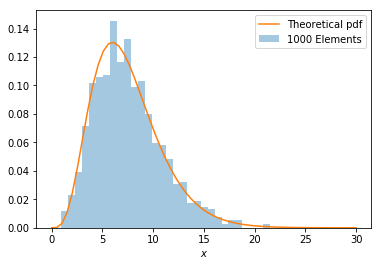

In [92]:
#строим гистограмму выборки
plt.hist(sample, bins=30, density=True, alpha=0.4, label='1000 Elements')

#рисуем поверх неё теоретическую плотность распределения гамма-распределения. 60 шагов
x = np.linspace(0,30,60)
pdf = gamma_rv.pdf(x)
plt.plot(x, pdf, label='Theoretical pdf', alpha=1.0)
plt.legend()

plt.xlabel('$x$')

# Гистограммы выборочных средних при 5/10/50 значениях, при объеме выбора 1000

Теоритическая дисперсия: 11.2275
Теоритическое среднее: 4.99
Теоритическое мат.ожидание: 7.485
Расчетная дисперсия при n=5: 2.21029694008
Расчетное среднее при n=5: 7.39774756021
Расчетное мат.ожидание при n=5: 1.48670674313
---
Расчетная дисперсия при n=10: 1.10712671739
Расчетное среднее при n=10: 7.4685411033
Расчетное мат.ожидание при n=10: 1.05220089213
---
Расчетная дисперсия при n=50: 0.212811233057
Расчетное среднее при n=50: 7.480857155
Расчетное мат.ожидание при n=50: 0.461314678996
---
Расчетная дисперсия при n=500: 0.0220023742239
Расчетное среднее при n=500: 7.48594031859
Расчетное мат.ожидание при n=500: 0.148331973033
---


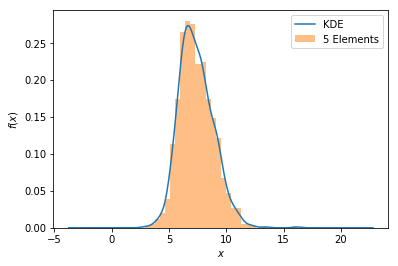

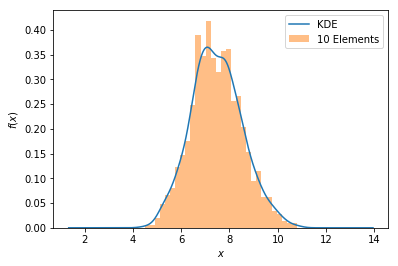

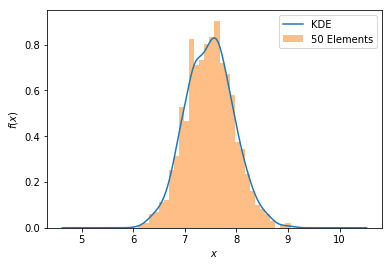

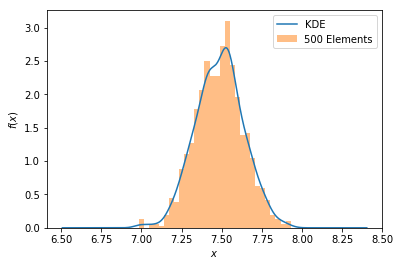

In [104]:
# функция определяет 5/10/50 значений гамма-распределения и возвращает среднюю
print 'Теоритическая дисперсия: {}'.format(D)
print 'Теоритическое среднее: {}'.format(k)
print 'Теоритическое мат.ожидание: {}'.format(M)
print '============================================================'


def getMeans(n):
    values = sts.gamma(a=k, loc=0.00, scale=theta).rvs(n)    
    return values.mean()

# функция запрашивает массив из 1000 выброчных средних и рисует на графике
def drawDiagram(n):   
        
    # получаем 1000 средних
    means = np.array([])
    for i in np.arange(0, 1000):
        means = np.append(means, getMeans(n))
    
    totalMean = np.mean(means) # рассчетное среднее
    totalM = np.std(means) # расчетное мат ожидание
    totalD = np.var(means) # расчетная дисперсия
    
    
    # рисуем график
    df = pd.DataFrame(means, columns=['KDE']) #плотность соответствующего нормального распределения
    ax = df.plot(kind='density')
        
    plt.hist(means, bins=30, density=True, histtype='stepfilled', alpha=0.5, label='%d Elements' % n) #гистограмма средних
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    
    print 'Расчетная дисперсия при n={}: {}'.format(*[n, totalD])
    print 'Расчетное среднее при n={}: {}'.format(*[n, totalMean])
    print 'Расчетное мат.ожидание при n={}: {}'.format(*[n, totalM])
    print '---'


#запускаем функцию расчета и построения графиков для n = 5/10/50
drawDiagram(5)
drawDiagram(10)
drawDiagram(50)
drawDiagram(500)



# Выводы

- При n=3 диаграмма похожа на типичное гамма-распределение (как диаграмма в начале). Чем дальше - тем сильнее стремится к "конусу" - плотности нормального распределения
- Чем больше объем выборки, тем меньше значение дисперсии и мат.ожидание на практическом расчете.
- расчетное среднее стремится к теоритической средней
- Разброс уменьшается.

